In [1]:
import os
import re
import pickle

import numpy as np
import pandas as pd

In [2]:
import torch
print(torch.__version__)

2.5.1+cu118


In [3]:
print("Is CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
print("CUDA version:", torch.version.cuda)
print("CUDA devices:", [torch.cuda.device(i) for i in range(torch.cuda.device_count())])
print("CUDA_VISIBLE_DEVICES:", os.environ.get('CUDA_VISIBLE_DEVICES'))

# Try to allocate a tensor on GPU
try:
    device = torch.device('cuda:0')
    torch.tensor([1.0], device=device)
    print("Successfully allocated tensor on GPU.")
except Exception as e:
    print("Failed to allocate tensor on GPU:", e)

Is CUDA available: True
CUDA device count: 1
CUDA version: 11.8
CUDA devices: [<torch.cuda.device object at 0x14af18d18df0>]
CUDA_VISIBLE_DEVICES: MIG-aa265898-f38d-56fb-a517-3ec989e16b08
Successfully allocated tensor on GPU.


In [4]:
import sys
sys.path.insert(0, '/n/home09/pren/3DGeno_tools/src/gt3d/modules')
# sys.path.append('/n/home09/pren/Higashi')
# sys.path = ['/n/home09/pren/3DGeno_tools/src/gt3d/modules'] + sys.path
sys.path


['/n/home09/pren/3DGeno_tools/src/gt3d/modules',
 '/n/home09/pren/.conda/envs/gt3d/lib/python310.zip',
 '/n/home09/pren/.conda/envs/gt3d/lib/python3.10',
 '/n/home09/pren/.conda/envs/gt3d/lib/python3.10/lib-dynload',
 '',
 '/n/home09/pren/.conda/envs/gt3d/lib/python3.10/site-packages',
 '/n/home09/pren/3DGeno_tools/src']

In [5]:
import higashi
print(higashi.__file__)

/n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/__init__.py


In [6]:
from higashi.Higashi_wrapper import *

In [7]:
fish_path = '/n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/multiplexed_fish'

In [8]:
cell_df = pd.read_csv(os.path.join(fish_path, '4DNESMTNNB3N/4DNFIA7FUW8Y.csv'), skiprows=22)
cell_df = cell_df.rename(columns={'##columns=(Cell_ID': 'Cell_ID', 'Zfp804b)': 'Zfp804b'})
cell_df


,Cell_ID,FOV_ID,cell_volume_from_merlin,cell_center_x_global,cell_center_y_global,RNA_experiment_ID,Sample_ID,cluster_subclass,cluster_class,neuron_identity,...,Unc13c,Unc5b,Unc5d,Ust,Vipr2,Vtn,Vwc2,Wipf3,Wnt7b,Zfp804b
0,103489270985795086009915676188840872439,0,403.121799,-5984.643199,3962.926100,20220304,C57BL/6_M_1_MOp_1,Astro,Astro,Non-Neuronal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,113811790893231448949429397438012891173,0,1345.443053,-6046.845801,3943.378100,20220304,C57BL/6_M_1_MOp_1,other,other,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,119547840309256440899855144626134392385,0,866.273544,-6009.207800,3915.406099,20220304,C57BL/6_M_1_MOp_1,other,other,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,120849314423504941338008541020153695260,0,1186.181156,-6114.885802,3938.572100,20220304,C57BL/6_M_1_MOp_1,other,other,other,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,125550627244524118102850004242680097855,0,281.811702,-6190.485804,3985.876101,20220304,C57BL/6_M_1_MOp_1,Peri,Peri,Non-Neuronal,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17851,89740340849279220555487673174291177981,167,746.108561,3028.620050,-2372.662093,20220304,C57BL/6_M_1_MOp_1,L5/6 NP,Gluta,Neuronal,...,5.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,0.0,1.0
17852,90550019712359509388050476283813007625,167,931.565237,3093.798051,-2484.658096,20220304,C57BL/6_M_1_MOp_1,L6 CT,Gluta,Neuronal,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,30.0,0.0,0.0
17853,91790428117198932838975210302149417238,167,146.709916,3073.926051,-2429.902094,20220304,C57BL/6_M_1_MOp_1,Astro,Astro,Non-Neuronal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17854,95847719459140129344505526245510134602,167,264.662706,3019.332049,-2441.458095,20220304,C57BL/6_M_1_MOp_1,L6 CT,Gluta,Neuronal,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,1.0


In [9]:
cell_ids = [re.search('cell\d+', filename).group()[4:] for filename in os.listdir(os.path.join(fish_path, 'merfish_contacts_thresh500nm'))]
len(cell_ids)

2420

In [10]:
training_data_meta = pd.DataFrame(cell_ids, columns=['Cell_ID']).merge(cell_df, on='Cell_ID', how='left')
training_data_meta

,Cell_ID,FOV_ID,cell_volume_from_merlin,cell_center_x_global,cell_center_y_global,RNA_experiment_ID,Sample_ID,cluster_subclass,cluster_class,neuron_identity,...,Unc13c,Unc5b,Unc5d,Ust,Vipr2,Vtn,Vwc2,Wipf3,Wnt7b,Zfp804b
0,100143354915909514340563966591344282617,84.0,852.211658,2475.098099,-1024.199995,20220304.0,C57BL/6_M_1_MOp_1,L2/3 IT,Gluta,Neuronal,...,2.0,2.0,0.0,1.0,0.0,0.0,0.0,33.0,0.0,1.0
1,100444929727335622562402977796883679092,8.0,844.089198,-5802.457800,4135.278100,20220304.0,C57BL/6_M_1_MOp_1,Endo,Endo,Non-Neuronal,...,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100636001562801092372127493520169017848,75.0,598.349001,-6372.189898,5324.277907,20220304.0,C57BL/6_M_1_MOp_1,VLMC,VLMC,Non-Neuronal,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100641667178165970074422975257012665391,84.0,762.882093,2494.970100,-1057.625996,20220304.0,C57BL/6_M_1_MOp_1,Endo,Endo,Non-Neuronal,...,2.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,100645494773040598441840741335181821324,81.0,917.879399,2390.604102,-437.051995,20220304.0,C57BL/6_M_1_MOp_1,Astro,Astro,Non-Neuronal,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,99732441040257909568179107546777692281,85.0,1189.559867,2588.552102,-950.289998,20220304.0,C57BL/6_M_1_MOp_1,Sst,GABA,Neuronal,...,13.0,2.0,6.0,7.0,1.0,1.0,13.0,17.0,1.0,0.0
2416,99760521419024717766427788907150197811,84.0,554.913079,2633.588103,-1030.841995,20220304.0,C57BL/6_M_1_MOp_1,L5 IT,Gluta,Neuronal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2417,99806661526131685558261006620437651282,72.0,625.749255,-6655.781900,5085.343906,20220304.0,C57BL/6_M_1_MOp_1,Endo,Endo,Non-Neuronal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2418,99895158179073067511837782015760741030,9.0,498.213556,-5864.665801,3896.452099,20220304.0,C57BL/6_M_1_MOp_1,Micro,Micro,Non-Neuronal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
label_info = {k:np.asarray(training_data_meta[k]) for k in training_data_meta.columns}
label_info_path = '/n/home09/pren/higfiles/merfish_metadata/label_info_500nmthresh.pickle'
with open(label_info_path, 'wb') as handle:
    pickle.dump(label_info, handle)

In [12]:
config = "/n/home09/pren/higfiles/configs/config_liu_zhuang_t5_500nmthresh.JSON"
config_info = {
    "data_dir": fish_path, # where the data is, the data has to be named as data.txt (v1) or filelist.txt (v2) or the code can't find it
    "label_path": label_info_path,
    "structured": True,
    "input_format": 'higashi_v2',
    "temp_dir": "/n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/embeddings_liu_zhuang_temp5_500nmthresh/", # where to store model temp files
    "genome_reference_path": "/n/home09/pren/higfiles/params/chromInfo.txt",
    "cytoband_path": "/n/home09/pren/higfiles/params/cytoBand.txt",
    "chrom_list": ['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr17', 'chr18', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr9',
       'chr16', 'chr19', 'chr2', 'chr8', "chrX"],
    "resolution": 2500000, # 2.5 Mbp
    "resolution_cell": 2500000,
    "resolution_fh": [2500000],
    "embedding_name": "test_dnamerfish_500nmthresh",
    "minimum_distance": 2500000,
    "maximum_distance": -1,
    "local_transfer_range": 0,
    "loss_mode": "zinb",
    "dimensions": 100, # can be adjusted later
    "impute_list":['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr17', 'chr18', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr9',
       'chr16', 'chr19', 'chr2', 'chr8', "chrX"],
    "neighbor_num": 5,
    "cpu_num": 10,
    "gpu_num": 1,
    "embedding_epoch":65, # this can be adjusted
    "correct_be_impute": True,
    "header_included": True,
    # "reprocess": True,
    # "contact_header": ['cell_id', 'chrom1', 'pos1', 'chrom2', 'pos2', 'count']
}

# save the config file to the current directory
import json
with open(config, "w") as f:
    json.dump(config_info, f, indent = 6)

In [13]:
# Initialize the Higashi instance
higashi_model = Higashi(config)


In [14]:
# Data processing (only needs to be run for once)
higashi_model.process_data()



[12/07/24 14:29:13] INFO     generate_chrom_start_end Found cached chromosome start/end dict:         ]8;id=878833;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=725738;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#90\90]8;;\
                             /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/embeddings_liu_zhu              
                             ang_temp5_500nmthresh/chrom_start_end.npy                                             

                    INFO     extract_table Found cached data tables:                                 ]8;id=798347;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=131498;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#225\225]8;;\
                                     /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/embedding               
                             s_liu_zhuang_temp5_500nmthresh/data.npy                                               
                                     /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/embedding               
                             s_liu_zhuang_temp5_500nmthresh/weight.npy                                             

                    INFO     create_matrix Generating contact maps for baseline                      ]8;id=839341;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=902876;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#511\511]8;;\

Output()

                    INFO     create_matrix Data loaded                                               ]8;id=27156;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=390679;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#516\516]8;;\

                    INFO     create_matrix Data size: 796,458                                        ]8;id=980011;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=466925;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#535\535]8;;\

                    INFO     create_matrix Found cached data with full set of keys (<HDF5 file       ]8;id=616051;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=690458;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#560\560]8;;\
                             "node_feats.hdf5" (mode r+)>):                                                        
                             /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/embeddings_liu_zh               
                             uang_temp5_500nmthresh/node_feats.hdf5                                                

In [15]:
higashi_model.prep_model()

                    INFO     fetch_info_from_config #CPU: 10                                 ]8;id=263816;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=630123;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#607\607]8;;\

                    INFO     get_free_gpu setting to gpu:0                                    ]8;id=80544;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=304556;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#68\68]8;;\

                    INFO     fetch_info_from_config Training on data from: ['chr1', 'chr10', ]8;id=237411;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=349267;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#627\627]8;;\
                             'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr17', 'chr18',                        
                             'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr9', 'chr16',                              
                             'chr19', 'chr2', 'chr8', 'chrX']                                                      

                    INFO     prep_model total_sparsity_cell = 4.2570400800323534e-05         ]8;id=762855;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=544661;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#811\811]8;;\

                    INFO     prep_model No contractive loss                                  ]8;id=132275;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=823704;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#823\823]8;;\

                    INFO     prep_model batch_size = 256                                     ]8;id=631745;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=169760;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#835\835]8;;\

                    INFO     prep_model Node type num [2420   79   53   49   49   49   50    ]8;id=554357;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=120935;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#866\866]8;;\
                             42   38   37   65   63   61   60                                                      
                                59   50   40   25   73   52   69] [2420 2499 2552 2601 2650                        
                             2699 2749 2791 2829 2866 2931 2994 3055 3115                                          
                              3174 3224 3264 3289 3362 3414 3483]                                                  

                    INFO     generate_attributes Start making attribute                      ]8;id=711194;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=874187;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#756\756]8;;\

Output()

[12/07/24 14:29:24] INFO     fit loss: 0.8282062411308289 loss_best: 0.7962300777435303 epochs: 123  ]8;id=660192;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_backend/Modules.py\Modules.py]8;;\:]8;id=316511;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_backend/Modules.py#334\334]8;;\

                    INFO     __init__ Initializing data generator                                   ]8;id=307814;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_backend/Modules.py\Modules.py]8;;\:]8;id=107919;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_backend/Modules.py#1177\1177]8;;\

                    INFO     __init__ Initializing data generator                                   ]8;id=257237;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_backend/Modules.py\Modules.py]8;;\:]8;id=982334;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_backend/Modules.py#1177\1177]8;;\

In [16]:
# Stage 1 training
higashi_model.train_for_embeddings()

                    INFO     train_for_embeddings First stage training                      ]8;id=409926;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=360457;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1596\1596]8;;\

                    INFO     train [ Epoch 0 of 65 ]                                        ]8;id=959425;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=314565;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:31:13] INFO     train  - (Train) bce:  0.4374, mse:  0.8569,  acc: 83.771 %,   ]8;id=122345;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=359545;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.439, spearman: 0.431, elapse: 108.946 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.4033,  acc: 86.159 %,pearson: 0.515,  ]8;id=290017;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=818197;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.497,elapse: 0.396 s                                                       

[12/07/24 14:31:14] INFO     train update_rate: 0.795764     1.129442        update_rate:   ]8;id=886067;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=786244;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\
                             0.000000   0.000000        pair_ratio: 0.1                                            

                    INFO     train [ Epoch 1 of 65 ]                                        ]8;id=194775;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=15335;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:32:59] INFO     train  - (Train) bce:  0.3884, mse:  0.8722,  acc: 85.817 %,   ]8;id=784225;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=860546;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.539, spearman: 0.505, elapse: 104.814 s                                    

Output()

[12/07/24 14:33:00] INFO     train  - (Valid) bce:  0.3977,  acc: 84.316 %,pearson: 0.544,  ]8;id=527983;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=306107;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.510,elapse: 0.614 s                                                       

                    INFO     train update_rate: 0.386655     3.183111        pair_ratio:    ]8;id=125855;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=668776;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\
                             0.2                                                                                   

                    INFO     train [ Epoch 2 of 65 ]                                        ]8;id=597695;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=119820;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:34:45] INFO     train  - (Train) bce:  0.3680, mse:  0.8835,  acc: 86.572 %,   ]8;id=470421;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=358880;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.572, spearman: 0.526, elapse: 104.275 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3749,  acc: 85.137 %,pearson: 0.564,  ]8;id=819781;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=419051;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.525,elapse: 0.452 s                                                       

                    INFO     train update_rate: 0.075115     0.683457        pair_ratio:    ]8;id=209602;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=566047;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\
                             0.3                                                                                   

[12/07/24 14:34:46] INFO     train [ Epoch 3 of 65 ]                                        ]8;id=892363;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=595559;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:36:31] INFO     train  - (Train) bce:  0.3603, mse:  0.8808,  acc: 87.008 %,   ]8;id=916195;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=151049;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.590, spearman: 0.536, elapse: 105.546 s                                    

Output()

[12/07/24 14:36:32] INFO     train  - (Valid) bce:  0.3779,  acc: 86.094 %,pearson: 0.561,  ]8;id=891846;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=642562;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.528,elapse: 0.401 s                                                       

                    INFO     train update_rate: 0.034493     0.239070        pair_ratio:    ]8;id=703999;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=353669;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\
                             0.4                                                                                   

[12/07/24 14:36:33] INFO     train [ Epoch 4 of 65 ]                                        ]8;id=167349;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=566126;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:38:05] INFO     train  - (Train) bce:  0.3561, mse:  0.9049,  acc: 87.300 %,   ]8;id=399054;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=851886;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.600, spearman: 0.541, elapse: 92.447 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3649,  acc: 87.396 %,pearson: 0.587,  ]8;id=524399;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=120308;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.539,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.016405     0.256050        pair_ratio:    ]8;id=531990;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=321834;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\
                             0.5                                                                                   

                    INFO     train [ Epoch 5 of 65 ]                                        ]8;id=588613;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=337325;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:39:35] INFO     train  - (Train) bce:  0.3537, mse:  1.7270,  acc: 87.391 %,   ]8;id=951932;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=540483;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.605, spearman: 0.543, elapse: 89.145 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3592,  acc: 87.819 %,pearson: 0.604,  ]8;id=509021;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=46250;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.546,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.012610     0.620343                       ]8;id=955999;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=120093;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 6 of 65 ]                                        ]8;id=977510;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=947828;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:41:04] INFO     train  - (Train) bce:  0.3489, mse:  0.9002,  acc: 87.640 %,   ]8;id=398632;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=309481;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.613, spearman: 0.547, elapse: 89.281 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3419,  acc: 87.585 %,pearson: 0.615,  ]8;id=875652;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=596876;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.555,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.010399     0.264573                       ]8;id=996897;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=85628;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 7 of 65 ]                                        ]8;id=540575;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=658206;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:42:35] INFO     train  - (Train) bce:  0.3471, mse:  0.9777,  acc: 87.796 %,   ]8;id=984689;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=843549;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.618, spearman: 0.549, elapse: 91.098 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3434,  acc: 88.568 %,pearson: 0.619,  ]8;id=32137;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=849754;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.555,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.009770     0.237548                       ]8;id=898823;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=130116;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 8 of 65 ]                                        ]8;id=471803;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=131921;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:44:04] INFO     train  - (Train) bce:  0.3477, mse:  2.6276,  acc: 87.784 %,   ]8;id=389024;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=925203;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.617, spearman: 0.549, elapse: 89.064 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3562,  acc: 87.812 %,pearson: 0.624,  ]8;id=897519;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=149174;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.553,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.007890     0.217170                       ]8;id=458040;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=470458;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 14:44:05] INFO     train [ Epoch 9 of 65 ]                                        ]8;id=657891;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=167340;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:45:34] INFO     train  - (Train) bce:  0.3412, mse:  0.8781,  acc: 88.172 %,   ]8;id=518509;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=224497;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.631, spearman: 0.555, elapse: 88.988 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3481,  acc: 88.079 %,pearson: 0.632,  ]8;id=694432;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=33774;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.557,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.013569     0.567725                       ]8;id=909745;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=802507;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 10 of 65 ]                                       ]8;id=310350;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=586463;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:47:03] INFO     train  - (Train) bce:  0.3411, mse:  1.3101,  acc: 88.182 %,   ]8;id=610355;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=341496;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.630, spearman: 0.555, elapse: 88.881 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3573,  acc: 87.715 %,pearson: 0.615,  ]8;id=717852;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=235472;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.547,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.007548     0.295342                       ]8;id=794981;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=869495;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 11 of 65 ]                                       ]8;id=540930;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=467797;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:48:32] INFO     train  - (Train) bce:  0.3381, mse:  0.9932,  acc: 88.394 %,   ]8;id=693734;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=778843;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.637, spearman: 0.558, elapse: 88.819 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3426,  acc: 88.132 %,pearson: 0.623,  ]8;id=298127;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=158016;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.552,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.007831     0.308510                       ]8;id=898289;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=424713;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 12 of 65 ]                                       ]8;id=856879;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=59778;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:50:01] INFO     train  - (Train) bce:  0.3385, mse:  0.9406,  acc: 88.351 %,   ]8;id=175279;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=510968;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.637, spearman: 0.558, elapse: 89.620 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3407,  acc: 89.271 %,pearson: 0.644,  ]8;id=778978;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=158916;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.564,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.007243     0.332496                       ]8;id=243427;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=432898;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 14:50:02] INFO     train [ Epoch 13 of 65 ]                                       ]8;id=841622;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=984289;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:51:31] INFO     train  - (Train) bce:  0.3343, mse:  1.3674,  acc: 88.646 %,   ]8;id=184812;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=836708;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.646, spearman: 0.562, elapse: 88.949 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3304,  acc: 88.978 %,pearson: 0.654,  ]8;id=551966;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=635012;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.567,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.007255     0.299165                       ]8;id=981325;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=744992;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 14 of 65 ]                                       ]8;id=962089;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=505362;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:53:00] INFO     train  - (Train) bce:  0.3347, mse:  0.9582,  acc: 88.609 %,   ]8;id=84788;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=761957;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.645, spearman: 0.561, elapse: 88.813 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3445,  acc: 87.923 %,pearson: 0.635,  ]8;id=609485;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=934515;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.557,elapse: 0.049 s                                                       

                    INFO     train update_rate: 0.006585     0.195947                       ]8;id=516310;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=590206;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 15 of 65 ]                                       ]8;id=628430;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=52333;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:54:29] INFO     train  - (Train) bce:  0.3324, mse:  0.9815,  acc: 88.695 %,   ]8;id=533512;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=839850;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.647, spearman: 0.563, elapse: 88.760 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3487,  acc: 88.014 %,pearson: 0.626,  ]8;id=143889;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=323315;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.547,elapse: 0.053 s                                                       

                    INFO     train update_rate: 0.007326     0.188547                       ]8;id=524364;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=431363;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 16 of 65 ]                                       ]8;id=868218;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=618441;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:55:58] INFO     train  - (Train) bce:  0.3327, mse:  0.9502,  acc: 88.729 %,   ]8;id=27204;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=279759;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.648, spearman: 0.563, elapse: 88.930 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3456,  acc: 87.923 %,pearson: 0.627,  ]8;id=457141;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=803856;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.551,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.005817     0.388081                       ]8;id=902589;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=35047;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 17 of 65 ]                                       ]8;id=437777;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=263545;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:57:27] INFO     train  - (Train) bce:  0.3299, mse:  2.6389,  acc: 88.948 %,   ]8;id=1019;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=217243;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.656, spearman: 0.566, elapse: 88.839 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3575,  acc: 87.826 %,pearson: 0.625,  ]8;id=994865;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=645050;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.550,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.005768     0.231181                       ]8;id=156094;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=779524;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 18 of 65 ]                                       ]8;id=373008;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=310888;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 14:58:56] INFO     train  - (Train) bce:  0.3296, mse:  0.8991,  acc: 88.961 %,   ]8;id=231430;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=259578;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.657, spearman: 0.566, elapse: 88.606 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3427,  acc: 88.587 %,pearson: 0.635,  ]8;id=881105;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=481347;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.557,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.005400     0.153275                       ]8;id=738402;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=157398;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 19 of 65 ]                                       ]8;id=348705;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=445475;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:00:25] INFO     train  - (Train) bce:  0.3275, mse:  1.0972,  acc: 89.071 %,   ]8;id=116539;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=735349;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.659, spearman: 0.568, elapse: 88.795 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3525,  acc: 88.262 %,pearson: 0.617,  ]8;id=455686;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=879958;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.549,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.007046     0.248586                       ]8;id=907726;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=189247;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 20 of 65 ]                                       ]8;id=756685;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=768016;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:01:54] INFO     train  - (Train) bce:  0.3266, mse:  1.1983,  acc: 89.168 %,   ]8;id=246551;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=371471;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.663, spearman: 0.569, elapse: 88.921 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3605,  acc: 88.132 %,pearson: 0.611,  ]8;id=780414;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=260893;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.549,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.005798     0.243915                       ]8;id=273271;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=397302;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 21 of 65 ]                                       ]8;id=917791;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=391473;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:03:23] INFO     train  - (Train) bce:  0.3283, mse:  0.9329,  acc: 89.025 %,   ]8;id=104803;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=555097;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.658, spearman: 0.567, elapse: 88.812 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3553,  acc: 88.079 %,pearson: 0.612,  ]8;id=508196;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=996006;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.549,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.004993     0.230969                       ]8;id=206138;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=445138;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 22 of 65 ]                                       ]8;id=419667;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=475329;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:04:52] INFO     train  - (Train) bce:  0.3259, mse:  0.9132,  acc: 89.165 %,   ]8;id=468286;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=130297;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.662, spearman: 0.569, elapse: 88.855 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3490,  acc: 89.622 %,pearson: 0.646,  ]8;id=32518;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=357133;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.568,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.004922     0.137810                       ]8;id=897663;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=428510;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 23 of 65 ]                                       ]8;id=889273;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=763098;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:06:21] INFO     train  - (Train) bce:  0.3258, mse:  0.9095,  acc: 89.204 %,   ]8;id=609908;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=830582;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.665, spearman: 0.570, elapse: 89.147 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3538,  acc: 87.949 %,pearson: 0.632,  ]8;id=771390;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=936235;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.553,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.004999     0.136034                       ]8;id=694897;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=462231;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 24 of 65 ]                                       ]8;id=979462;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=472191;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:07:50] INFO     train  - (Train) bce:  0.3227, mse:  0.8717,  acc: 89.413 %,   ]8;id=822805;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=615292;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.670, spearman: 0.573, elapse: 88.949 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3545,  acc: 88.249 %,pearson: 0.616,  ]8;id=228466;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=895974;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.552,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.005210     0.110219                       ]8;id=33101;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=962304;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 25 of 65 ]                                       ]8;id=255101;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=811197;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:09:19] INFO     train  - (Train) bce:  0.3231, mse:  0.9017,  acc: 89.389 %,   ]8;id=337147;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=883276;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.669, spearman: 0.572, elapse: 88.768 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3437,  acc: 88.158 %,pearson: 0.624,  ]8;id=619314;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=571050;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.553,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.004963     0.177729                       ]8;id=714694;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=278952;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 26 of 65 ]                                       ]8;id=172749;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=590476;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:10:50] INFO     train  - (Train) bce:  0.3212, mse:  0.9651,  acc: 89.486 %,   ]8;id=931317;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=86248;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.673, spearman: 0.574, elapse: 90.287 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3641,  acc: 88.626 %,pearson: 0.624,  ]8;id=203240;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=868273;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.555,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.005615     0.194308                       ]8;id=398846;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=778821;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 27 of 65 ]                                       ]8;id=876916;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=540005;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:12:19] INFO     train  - (Train) bce:  0.3192, mse:  0.9814,  acc: 89.630 %,   ]8;id=696397;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=445284;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.677, spearman: 0.576, elapse: 88.903 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3440,  acc: 88.958 %,pearson: 0.641,  ]8;id=805496;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=844062;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.561,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.005096     0.238078                       ]8;id=242944;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=583312;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 28 of 65 ]                                       ]8;id=494526;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=871762;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:13:48] INFO     train  - (Train) bce:  0.3187, mse:  0.9496,  acc: 89.643 %,   ]8;id=947805;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=853436;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.676, spearman: 0.576, elapse: 88.834 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3537,  acc: 88.939 %,pearson: 0.633,  ]8;id=482484;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=973234;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.566,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.005225     0.220353                       ]8;id=994991;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=323822;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 29 of 65 ]                                       ]8;id=66706;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=2488;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:15:17] INFO     train  - (Train) bce:  0.3228, mse:  1.0174,  acc: 89.360 %,   ]8;id=889124;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=314074;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.670, spearman: 0.572, elapse: 88.704 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3518,  acc: 88.281 %,pearson: 0.625,  ]8;id=520609;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=959628;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.551,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.005440     0.096865                       ]8;id=731599;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=935993;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 30 of 65 ]                                       ]8;id=319719;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=911742;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:16:46] INFO     train  - (Train) bce:  0.3188, mse:  0.8718,  acc: 89.710 %,   ]8;id=679073;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=980655;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.678, spearman: 0.576, elapse: 89.020 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3747,  acc: 89.076 %,pearson: 0.625,  ]8;id=310908;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=381525;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.559,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.004858     0.237468                       ]8;id=809908;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=634551;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 31 of 65 ]                                       ]8;id=354260;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=557087;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:18:15] INFO     train  - (Train) bce:  0.3196, mse:  0.8859,  acc: 89.593 %,   ]8;id=336399;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=85649;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.677, spearman: 0.576, elapse: 89.004 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3536,  acc: 87.760 %,pearson: 0.617,  ]8;id=338178;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=833773;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.548,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.003670     0.174996                       ]8;id=705028;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=427700;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 32 of 65 ]                                       ]8;id=607064;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=231127;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:19:44] INFO     train  - (Train) bce:  0.3171, mse:  1.1167,  acc: 89.763 %,   ]8;id=658836;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=770470;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.681, spearman: 0.578, elapse: 89.050 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3625,  acc: 89.264 %,pearson: 0.638,  ]8;id=110799;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=319729;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.561,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.004460     0.106013                       ]8;id=521159;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=944608;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 33 of 65 ]                                       ]8;id=626323;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=399232;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:21:14] INFO     train  - (Train) bce:  0.3178, mse:  0.9300,  acc: 89.718 %,   ]8;id=867864;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=265996;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.680, spearman: 0.577, elapse: 89.302 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3501,  acc: 88.978 %,pearson: 0.641,  ]8;id=221881;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=679753;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.563,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.003833     0.121638                       ]8;id=231779;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=631961;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 34 of 65 ]                                       ]8;id=266399;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=412743;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:22:43] INFO     train  - (Train) bce:  0.3160, mse:  0.8645,  acc: 89.807 %,   ]8;id=407807;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=143518;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.683, spearman: 0.579, elapse: 89.086 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3604,  acc: 88.652 %,pearson: 0.628,  ]8;id=92121;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=717572;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.553,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.004404     0.181964                       ]8;id=244948;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=196817;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 35 of 65 ]                                       ]8;id=347682;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=591954;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:24:12] INFO     train  - (Train) bce:  0.3167, mse:  0.8606,  acc: 89.789 %,   ]8;id=531185;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=265187;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.683, spearman: 0.579, elapse: 89.113 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3670,  acc: 88.477 %,pearson: 0.625,  ]8;id=668364;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=259535;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.550,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.003809     0.069682                       ]8;id=263593;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=769142;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 36 of 65 ]                                       ]8;id=152303;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=830736;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:25:42] INFO     train  - (Train) bce:  0.3129, mse:  0.9097,  acc: 90.025 %,   ]8;id=494860;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=569707;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.690, spearman: 0.582, elapse: 89.397 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3689,  acc: 88.249 %,pearson: 0.618,  ]8;id=364411;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=553118;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.550,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.003774     0.095919                       ]8;id=103703;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=221023;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 37 of 65 ]                                       ]8;id=720309;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=474474;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:27:11] INFO     train  - (Train) bce:  0.3155, mse:  0.8673,  acc: 89.886 %,   ]8;id=301292;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=661516;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.685, spearman: 0.580, elapse: 89.006 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3549,  acc: 88.802 %,pearson: 0.626,  ]8;id=47744;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=615385;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.559,elapse: 0.053 s                                                       

                    INFO     train update_rate: 0.004411     0.152993                       ]8;id=728997;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=660947;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 38 of 65 ]                                       ]8;id=500085;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=895977;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:28:40] INFO     train  - (Train) bce:  0.3155, mse:  0.8920,  acc: 89.900 %,   ]8;id=101300;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=690726;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.686, spearman: 0.580, elapse: 88.999 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3552,  acc: 88.223 %,pearson: 0.628,  ]8;id=421990;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=337143;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.553,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.003511     0.075664                       ]8;id=231450;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=954175;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 39 of 65 ]                                       ]8;id=398847;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=80273;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:30:09] INFO     train  - (Train) bce:  0.3128, mse:  0.8924,  acc: 90.029 %,   ]8;id=772035;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=2719;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.689, spearman: 0.582, elapse: 88.888 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3678,  acc: 88.965 %,pearson: 0.628,  ]8;id=687646;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=825164;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.559,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.004066     0.121327                       ]8;id=899760;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=609529;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 40 of 65 ]                                       ]8;id=672396;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=731916;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:31:38] INFO     train  - (Train) bce:  0.3124, mse:  0.8652,  acc: 89.996 %,   ]8;id=694402;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=221723;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.690, spearman: 0.582, elapse: 88.821 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3631,  acc: 88.848 %,pearson: 0.624,  ]8;id=743776;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=339740;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.553,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.003362     0.139198                       ]8;id=23989;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=757776;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 41 of 65 ]                                       ]8;id=210293;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=750017;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:33:07] INFO     train  - (Train) bce:  0.3136, mse:  0.9011,  acc: 90.018 %,   ]8;id=870166;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=926980;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.690, spearman: 0.582, elapse: 88.780 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3723,  acc: 88.001 %,pearson: 0.606,  ]8;id=874886;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=477431;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.547,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.003154     0.125972                       ]8;id=585182;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=113135;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 42 of 65 ]                                       ]8;id=237760;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=539295;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:34:36] INFO     train  - (Train) bce:  0.3148, mse:  0.9201,  acc: 89.872 %,   ]8;id=417529;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=175748;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.686, spearman: 0.580, elapse: 88.827 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3939,  acc: 88.848 %,pearson: 0.625,  ]8;id=760667;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=511900;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.557,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.003104     0.071689                       ]8;id=997071;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=377253;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 43 of 65 ]                                       ]8;id=341547;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=643653;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:36:06] INFO     train  - (Train) bce:  0.3125, mse:  0.8972,  acc: 90.017 %,   ]8;id=720124;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=528273;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.690, spearman: 0.582, elapse: 89.333 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3608,  acc: 88.522 %,pearson: 0.623,  ]8;id=493189;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=41415;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.559,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.003665     0.138354                       ]8;id=258900;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=98030;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 44 of 65 ]                                       ]8;id=58237;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=293603;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:37:35] INFO     train  - (Train) bce:  0.3131, mse:  1.0270,  acc: 90.048 %,   ]8;id=793350;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=806;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.691, spearman: 0.582, elapse: 89.612 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3756,  acc: 88.691 %,pearson: 0.624,  ]8;id=827356;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=253038;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.558,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.003415     0.070474                       ]8;id=495107;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=207294;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 15:37:36] INFO     train [ Epoch 45 of 65 ]                                       ]8;id=685490;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=444721;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:39:12] INFO     train  - (Train) bce:  0.3093, mse:  0.9324,  acc: 90.293 %,   ]8;id=132;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=533407;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.698, spearman: 0.586, elapse: 96.071 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3676,  acc: 88.288 %,pearson: 0.614,  ]8;id=681227;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=18034;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.552,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.003794     0.134597                       ]8;id=772168;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=574440;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 46 of 65 ]                                       ]8;id=223477;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=820529;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:40:42] INFO     train  - (Train) bce:  0.3122, mse:  0.8615,  acc: 90.088 %,   ]8;id=744088;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=669654;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.692, spearman: 0.584, elapse: 90.125 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3810,  acc: 89.036 %,pearson: 0.641,  ]8;id=37068;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=517167;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.560,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.002891     0.092899                       ]8;id=930719;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=175643;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 47 of 65 ]                                       ]8;id=748379;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=921179;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:42:11] INFO     train  - (Train) bce:  0.3103, mse:  0.8678,  acc: 90.192 %,   ]8;id=822673;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=6798;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.695, spearman: 0.584, elapse: 89.112 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3822,  acc: 89.896 %,pearson: 0.660,  ]8;id=747135;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=92403;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.576,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002112     0.127064                       ]8;id=893376;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=856115;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 48 of 65 ]                                       ]8;id=221924;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=901898;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:43:41] INFO     train  - (Train) bce:  0.3085, mse:  0.8721,  acc: 90.313 %,   ]8;id=607699;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=232415;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.698, spearman: 0.587, elapse: 89.180 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3763,  acc: 88.737 %,pearson: 0.630,  ]8;id=844394;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=624019;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.554,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002968     0.146045                       ]8;id=112618;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=778528;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 49 of 65 ]                                       ]8;id=619066;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=357156;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:45:10] INFO     train  - (Train) bce:  0.3113, mse:  0.8876,  acc: 90.085 %,   ]8;id=140144;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=480815;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.692, spearman: 0.584, elapse: 89.451 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3775,  acc: 89.134 %,pearson: 0.621,  ]8;id=251920;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=206659;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.557,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002583     0.092000                       ]8;id=653592;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=915831;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 50 of 65 ]                                       ]8;id=124331;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=147826;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:46:40] INFO     train  - (Train) bce:  0.3096, mse:  0.9217,  acc: 90.240 %,   ]8;id=301153;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=325803;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.697, spearman: 0.586, elapse: 89.856 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3840,  acc: 88.529 %,pearson: 0.608,  ]8;id=176850;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=434612;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.552,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.002463     0.101315                       ]8;id=461684;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=692686;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 51 of 65 ]                                       ]8;id=856110;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=435079;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:48:17] INFO     train  - (Train) bce:  0.3106, mse:  0.8857,  acc: 90.138 %,   ]8;id=139391;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=35143;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.693, spearman: 0.585, elapse: 96.447 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3717,  acc: 88.451 %,pearson: 0.616,  ]8;id=258354;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=718883;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.555,elapse: 0.053 s                                                       

                    INFO     train update_rate: 0.003521     0.139689                       ]8;id=208551;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=550832;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 52 of 65 ]                                       ]8;id=401081;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=826906;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:49:47] INFO     train  - (Train) bce:  0.3090, mse:  0.8672,  acc: 90.303 %,   ]8;id=825106;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=22644;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.698, spearman: 0.586, elapse: 90.294 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3649,  acc: 88.438 %,pearson: 0.615,  ]8;id=102176;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=27595;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.557,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002282     0.157665                       ]8;id=351268;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=138275;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 53 of 65 ]                                       ]8;id=443988;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=158419;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:51:17] INFO     train  - (Train) bce:  0.3088, mse:  0.9627,  acc: 90.313 %,   ]8;id=949444;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=627507;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.699, spearman: 0.587, elapse: 89.110 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3757,  acc: 88.171 %,pearson: 0.609,  ]8;id=147130;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=813643;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.549,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.002272     0.133921                       ]8;id=893573;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=481858;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 54 of 65 ]                                       ]8;id=705053;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=708358;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:52:53] INFO     train  - (Train) bce:  0.3081, mse:  0.8757,  acc: 90.330 %,   ]8;id=55845;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=885146;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.699, spearman: 0.588, elapse: 96.398 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3559,  acc: 88.255 %,pearson: 0.631,  ]8;id=730056;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=707199;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.557,elapse: 0.055 s                                                       

                    INFO     train update_rate: 0.002457     0.144833                       ]8;id=712202;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=492502;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 55 of 65 ]                                       ]8;id=41806;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=116738;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:54:23] INFO     train  - (Train) bce:  0.3089, mse:  0.9174,  acc: 90.268 %,   ]8;id=833340;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=927554;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.699, spearman: 0.588, elapse: 89.945 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3695,  acc: 88.053 %,pearson: 0.607,  ]8;id=571724;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=113843;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.546,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.002283     0.074120                       ]8;id=5071;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=770326;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 56 of 65 ]                                       ]8;id=926388;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=34728;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:55:54] INFO     train  - (Train) bce:  0.3093, mse:  0.8693,  acc: 90.231 %,   ]8;id=859064;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=153181;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.697, spearman: 0.587, elapse: 90.664 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3759,  acc: 89.121 %,pearson: 0.624,  ]8;id=553195;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=218542;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.557,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002327     0.093172                       ]8;id=154061;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=784284;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 57 of 65 ]                                       ]8;id=50624;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=16373;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:57:24] INFO     train  - (Train) bce:  0.3087, mse:  1.0143,  acc: 90.319 %,   ]8;id=966835;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=801864;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.698, spearman: 0.588, elapse: 89.356 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3663,  acc: 89.108 %,pearson: 0.623,  ]8;id=89727;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=109779;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.565,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002463     0.093658                       ]8;id=893755;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=235402;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 58 of 65 ]                                       ]8;id=366991;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=774255;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 15:58:58] INFO     train  - (Train) bce:  0.3060, mse:  0.8833,  acc: 90.451 %,   ]8;id=159831;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=224911;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.702, spearman: 0.589, elapse: 94.129 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3642,  acc: 89.108 %,pearson: 0.646,  ]8;id=297377;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=516278;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.561,elapse: 0.053 s                                                       

                    INFO     train update_rate: 0.002370     0.082774                       ]8;id=706207;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=827713;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 59 of 65 ]                                       ]8;id=683924;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=244643;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 16:00:28] INFO     train  - (Train) bce:  0.3086, mse:  0.8907,  acc: 90.251 %,   ]8;id=806423;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=662841;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.697, spearman: 0.587, elapse: 89.797 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3724,  acc: 88.900 %,pearson: 0.626,  ]8;id=199134;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=431432;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.560,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.001835     0.062330                       ]8;id=631396;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=781597;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 60 of 65 ]                                       ]8;id=225281;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=512956;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 16:01:57] INFO     train  - (Train) bce:  0.3090, mse:  0.8807,  acc: 90.241 %,   ]8;id=51469;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=446601;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.696, spearman: 0.587, elapse: 89.195 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3843,  acc: 89.362 %,pearson: 0.640,  ]8;id=122934;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=814941;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.558,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.002260     0.071606                       ]8;id=94984;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=479883;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 61 of 65 ]                                       ]8;id=233374;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=943528;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 16:03:30] INFO     train  - (Train) bce:  0.3066, mse:  0.9487,  acc: 90.389 %,   ]8;id=224227;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=630791;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.702, spearman: 0.590, elapse: 92.894 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3718,  acc: 89.355 %,pearson: 0.632,  ]8;id=728310;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=609106;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.567,elapse: 0.053 s                                                       

                    INFO     train update_rate: 0.002564     0.110021                       ]8;id=698826;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=223125;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 62 of 65 ]                                       ]8;id=654226;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=766851;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 16:05:00] INFO     train  - (Train) bce:  0.3050, mse:  0.8660,  acc: 90.508 %,   ]8;id=624533;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=57832;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.706, spearman: 0.591, elapse: 89.337 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3669,  acc: 89.277 %,pearson: 0.636,  ]8;id=298008;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=207528;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.565,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.002244     0.083188                       ]8;id=871175;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=642075;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 63 of 65 ]                                       ]8;id=114922;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=221785;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 16:06:29] INFO     train  - (Train) bce:  0.3062, mse:  0.8779,  acc: 90.460 %,   ]8;id=497150;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=305159;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.704, spearman: 0.590, elapse: 89.188 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3878,  acc: 87.826 %,pearson: 0.603,  ]8;id=15694;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=707109;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.540,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.002196     0.087113                       ]8;id=859154;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=354635;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 64 of 65 ]                                       ]8;id=934328;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=149105;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 16:07:58] INFO     train  - (Train) bce:  0.3060, mse:  0.8806,  acc: 90.392 %,   ]8;id=926815;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=532815;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.702, spearman: 0.590, elapse: 88.816 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3612,  acc: 88.952 %,pearson: 0.636,  ]8;id=64289;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=194801;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.566,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.002365     0.114808                       ]8;id=782897;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=151335;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

Output()

[12/07/24 16:07:59] INFO     train  - (Validation-hyper) bce:  0.4745,  acc: 81.265 %, auc: ]8;id=305921;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=168510;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1328\1328]8;;\
                             0.454, aupr: 0.441,elapse: 1.050 s                                                    

In [17]:
training_data_meta['cluster_subclass'].unique()

array(['L2/3 IT', 'Endo', 'VLMC', 'Astro', 'Oligo', 'Sst', 'OPC', 'L5 IT',
       'L4/5 IT', 'Vip', 'L6 CT', 'L5 ET', 'Micro', 'Pvalb', 'L6 IT',
       'SMC', 'Peri', 'Lamp5', 'L6b', nan, 'L5/6 NP', 'other', 'Sncg'],
      dtype=object)

In [18]:
training_data_meta['cluster_class'].unique()

array(['Gluta', 'Endo', 'VLMC', 'Astro', 'Oligo', 'GABA', 'Micro', 'SMC',
       'Peri', nan, 'other'], dtype=object)

(2420, 100)
vec:  [[11.034867   2.943558 ]
 [ 6.0706944  2.806181 ]
 [ 9.343161   3.1955163]
 ...
 [ 6.565313   2.4826782]
 [ 7.587093   2.6034663]
 [11.447548   1.7926501]]
type(vec):  <class 'numpy.ndarray'>
vec.shape:  (2420, 2)


ValueError: All arrays must be of the same length

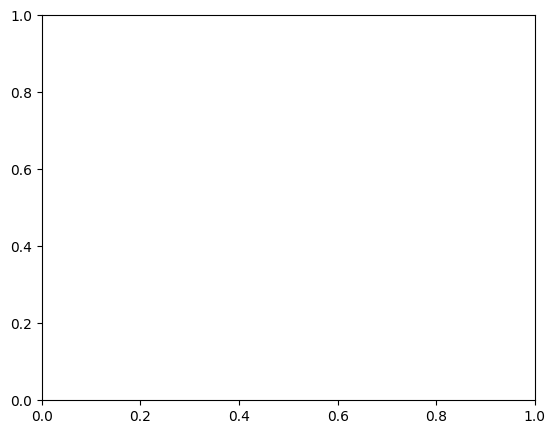

In [19]:
# Visualize initial embedding results
cell_embeddings = higashi_model.fetch_cell_embeddings()
print (cell_embeddings.shape)

from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt

vec = UMAP(n_components=2, n_neighbors=5, random_state=0).fit_transform(cell_embeddings)
# cell_type = higashi_model.label_info['cluster_subclass']
cell_type = higashi_model.label_info['cluster_class']
batch = higashi_model.label_info['Sample_ID']
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
print('vec: ', vec)
print('type(vec): ', type(vec))
print('vec.shape: ', vec.shape)
# sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=5, alpha=0.8, linewidth=0,
#                 hue_order=['L2/3 IT', 'Endo', 'VLMC', 'Astro', 'Oligo', 'Sst', 'OPC', 'L5 IT',
#                            'L4/5 IT', 'Vip', 'L5 ET', 'Micro', 'Pvalb', 'L6 IT', 'L6 CT',
#                            'SMC', 'Peri', 'Lamp5', 'L6b', 'L5/6 NP', 'other', 'Sncg'])
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=5, alpha=0.8, linewidth=0,
                hue_order=['Gluta', 'Endo', 'VLMC', 'Astro', 'Oligo', 'GABA', 'Micro', 'SMC',
                           'Peri', 'other'])
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
ax = plt.subplot(1, 2, 2)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=batch, ax=ax, s=5, alpha=0.8, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.tight_layout()
plt.show()


In [ ]:
# np.save('/n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/test2/state/embeddings_dnamerfish_stage1_r2.npy', cell_embeddings)

In [ ]:
higashi_model.current_device

In [ ]:
# higashi_model.higashi_model = torch.load(higashi_model.save_path + "_stage1_model", map_location=higashi_model.current_device)
# higashi_model.node_embedding_init = None


In [ ]:
higashi_model.train_for_imputation_nbr_0()
higashi_model.impute_no_nbr()

In [ ]:
higashi_model.train_for_imputation_with_nbr()
higashi_model.impute_with_nbr()

In [ ]:
# Visualize final embedding results
cell_embeddings = higashi_model.fetch_cell_embeddings()
print (cell_embeddings.shape)

from sklearn.decomposition import PCA

cell_type = higashi_model.label_info['cluster_class']
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
vec = PCA(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
ax = plt.subplot(1, 2, 2)
vec = UMAP(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.tight_layout()
plt.savefig('/n/home09/pren/figures/dnamerfish_pca_umapp_500nmthresh.png')
plt.show()

In [ ]:
# Visualize final embedding results
cell_embeddings = higashi_model.fetch_cell_embeddings()
print (cell_embeddings.shape)

from sklearn.decomposition import PCA

cell_type = higashi_model.label_info['neuron_identity']
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
vec = PCA(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
ax = plt.subplot(1, 2, 2)
vec = UMAP(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.tight_layout()
plt.savefig('/n/home09/pren/figures/dnamerfish_pca_umapp_neuronlabels_500nm_thresh.png')
plt.show()

In [ ]:
# ori.data

In [ ]:
count = 0
fig = plt.figure(figsize=(6, 2*5))
i = 0
for id_ in np.random.randint(0, 620, 620):
    if i == 5:
        break
    ori, nbr0, nbr5 = higashi_model.fetch_map("chr3", id_)
    # print('ori.data.shape: ', ori.data.shape)
    if ori.data.shape[0] == 0:
        continue
    else:
        i += 1
    count += 1
    ax = plt.subplot(5, 3, count * 3 - 2)
    ax.imshow(ori.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(ori.data, 0.6))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("raw")
    ax.set_ylabel(f'Cell {id_}')

    
    ax = plt.subplot(5, 3, count * 3 - 1)
    ax.imshow(nbr0.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(nbr0.data, 0.95))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("higashi, k=0")
    
    ax = plt.subplot(5, 3, count * 3)
    ax.imshow(nbr5.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(nbr5.data, 0.95))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("higashi, k=5")

plt.tight_layout()
# plt.suptitle('Chromosome 3')

plt.savefig('/n/home09/pren/figures/dnamerfish_imputation_500nmthresh.png')